# Practical 3: Applications of Matrices in Statistics

In a study on the cost of transporting milk from farms to dairy plants, a survey was taken of firms engaged in milk transportation. Cost data on $X_1$ = fuel, $X_2$ = repair and $X_3$ = capital, all measured on a per-mile basis from 34 firms were taken. The table below shows part of the data collected.

| Fuel ($X_1$) | Repair ($X_2$) | Capital ($X_3$) |
| --- | --- | --- |
| 16.44 | 12.43 | 11.23 |
| 7.19 | 2.7 | 3.92 |
| ⋮ | ⋮ | ⋮ |
| 17.32 | 6.86 | 4.44 |

(a) Plot a scatter matrix to visualise the relationship between $X_1$, $X_2$ and $X_3$. Are the data approximately multivariate normal?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv("./Practical3.csv")
data.head()

,Fuel,Repair,Capital
0,16.44,12.43,11.23
1,7.19,2.70,3.92
2,9.92,1.35,9.75
3,4.24,5.78,7.78
4,11.20,5.05,10.67


In [3]:
data.to_numpy()

array([[16.44, 12.43, 11.23],
       [ 7.19,  2.7 ,  3.92],
       [ 9.92,  1.35,  9.75],
       [ 4.24,  5.78,  7.78],
       [11.2 ,  5.05, 10.67],
       [14.25,  5.78,  9.88],
       [13.5 , 10.98, 10.6 ],
       [13.32, 14.27,  9.45],
       [12.68,  7.61, 10.23],
       [ 7.51,  5.8 ,  8.13],
       [ 9.9 ,  3.63,  9.13],
       [10.25,  5.07, 10.17],
       [11.11,  6.15,  7.61],
       [12.17, 14.26, 14.39],
       [10.24,  2.59,  6.09],
       [10.18,  6.05, 12.14],
       [ 8.88,  2.7 , 12.23],
       [12.34,  7.73, 11.68],
       [ 8.51, 14.02, 12.01],
       [12.95,  8.24,  7.18],
       [16.93, 13.37, 17.59],
       [14.7 , 10.78, 14.58],
       [10.32,  5.16, 17.  ],
       [ 8.98,  4.49,  4.26],
       [ 9.7 , 11.59,  6.83],
       [12.72,  8.63,  5.59],
       [ 9.49,  2.16,  6.23],
       [ 8.22,  7.95,  6.72],
       [13.7 , 11.22,  4.91],
       [ 8.21,  9.85,  8.17],
       [15.86, 11.42, 13.06],
       [ 9.18,  9.18,  9.49],
       [12.49,  4.67, 11.94],
       [17

<Figure size 432x288 with 0 Axes>

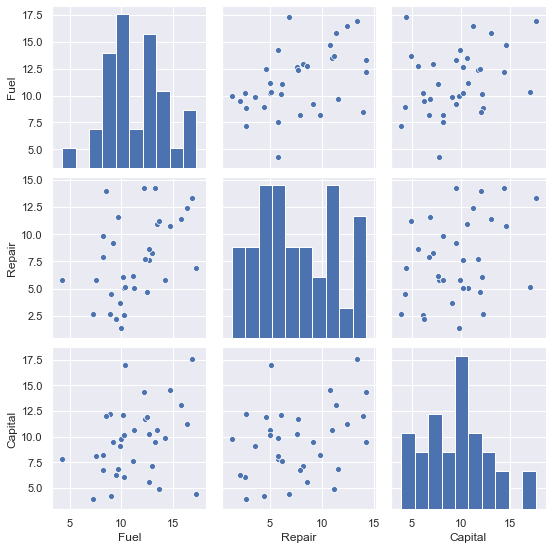

In [4]:
plt.clf()
sm = sns.pairplot(data)
plt.show()

(b) Find the sample mean vector, sample covariance matrix and sample correlation matrix of **<span style='font-family:"Times New Roman"'> <span styel=''><font size="4">X<font>**.

In [5]:
#Find sample mean vector. axis=0 indicates each column in the data matrix is a variable.
x_bar = np.mean(data, axis=0)

In [6]:
x_bar

Fuel       11.311765
Repair      7.632941
Capital     9.561176
dtype: float64

In [7]:
# Find sample covariance matrix. rowvar=0 indicates each column in the data matrix is a variable. 
C = np.cov(data, rowvar=0)

In [8]:
C

array([[ 9.02502103,  5.1557492 ,  3.20167059],
       [ 5.1557492 , 14.25869412,  4.31894492],
       [ 3.20167059,  4.31894492, 11.98734403]])

In [9]:
#Find sample correlation matrix
R = np.corrcoef(data, rowvar=0)

In [10]:
R

array([[1.        , 0.45449362, 0.3078159 ],
       [0.45449362, 1.        , 0.33035152],
       [0.3078159 , 0.33035152, 1.        ]])

(c) Find the generalised sample variance and total sample variance.

In [11]:
#Find generalised sample variance
np.linalg.det(C)

1052.024887663679

In [12]:
np.trace(C)

35.27105918003564

(d) Compute the sample mean and sample variance of a firm’s operational cost of transporting milk per mile, which comprises of fuel cost and repair cost.

Let the operational cost of transporting milk be $Y_1$.<br>
$Y_1 = X_1 + X_2$

In [13]:
#Find the data of operational cost
y1 = data.loc[:,'Fuel'] + data.loc[:,'Repair']
y1.head()

0    28.87
1     9.89
2    11.27
3    10.02
4    16.25
dtype: float64

In [14]:
#Find sample mean of operational cost
y1_bar = np.mean(y1, axis=0)
y1_bar

18.94470588235294

In [15]:
#Find sample variance of operational cost
y1_C = np.cov(y1, rowvar=0)
y1_C

array(33.59521355)

(e) Compute the sample mean and sample variance of a firm’s total cost of ownership of the trucks per mile for transporting milk, which comprises of fuel cost, repair cost and capital cost.

In [16]:
# Y2 = X1 + X2 + X3
y2 = data.loc[:,'Fuel'] + data.loc[:,'Repair'] + data.loc[:,'Capital']
y2.head()

0    40.10
1    13.81
2    21.02
3    17.80
4    26.92
dtype: float64

In [17]:
#Find sample mean of total cost of ownership
y2_bar = np.mean(y2, axis=0)
y2_bar

28.505882352941182

In [18]:
#Find sample variance of total cost of ownership
y2_C = np.cov(y2, rowvar=0)
y2_C

array(60.62378859)

(f) Determine the sample sample covariance matrix for the variables in parts (d) and (e).

In [19]:
Y = pd.concat([y1, y2], axis=1)
Y.head()

,0,1
0,28.87,40.10
1,9.89,13.81
2,11.27,21.02
3,10.02,17.80
4,16.25,26.92


In [20]:
Cy = np.cov(Y, rowvar=0)
Cy

array([[33.59521355, 41.11582906],
       [41.11582906, 60.62378859]])